# MEEN 423 Hw 4
# Marawan Hussein
# 328000022

# Task 1

In [1]:
import pandas as pd

# read csv file
df = pd.read_csv("concrete.csv")
# display DataFrame
df


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [2]:
df.info

<bound method DataFrame.info of       cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2   

# Task 2

In [3]:
df.isnull().sum()
df.dtypes
from sklearn import preprocessing

# Get column names first
columnname = df.columns
# Create the Scaler object
scaler = preprocessing.MinMaxScaler()
# Fit your data on the scaler object
data_normalized = scaler.fit_transform(df)
data_normalized = pd.DataFrame(data_normalized, columns=columnname)
data_normalized.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176,0.343341
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714,0.263859
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176,0.334994
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176,0.542170
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176,0.198829


# Task 3

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


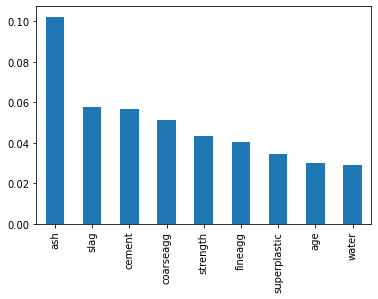

In [4]:
data_var = data_normalized.var()
data_var = data_var.sort_values(ascending=False)
data_var.head(10).plot(kind='bar')

from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=0.05):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

variance_threshold_selector(df, 0.5)


Ash has the highest

# Task 4

In [5]:

from sklearn.preprocessing import KBinsDiscretizer


est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df_bin=data_normalized.copy(deep=True)
for i in df_bin:
    df_bin[i]= est.fit_transform( df_bin[[i]])
 
print(df_bin.head(5))  
                                              

   cement  slag  ash  water  superplastic  coarseagg  fineagg  age  strength
0     0.0   5.0  0.0    6.0           0.0        4.0      3.0  0.0       3.0
1     1.0   1.0  6.0    2.0           3.0        8.0      5.0  0.0       2.0
2     3.0   0.0  4.0    5.0           1.0        4.0      6.0  0.0       3.0
3     3.0   3.0  0.0    8.0           0.0        3.0      1.0  0.0       5.0
4     1.0   5.0  0.0    5.0           2.0        7.0      2.0  0.0       1.0


# Task 5

In [6]:
# Load libraries

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Create features and target
X = df_bin
y = df_bin.strength

# Convert to categorical data by converting data to integers
X = X.astype(int)

# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:',X_kbest_features.shape[1])

feature_scores = pd.DataFrame({'Score':chi2_features.scores_,
'P_value':chi2_features.pvalues_},
index=df.columns)
feature_scores1= feature_scores.sort_values('P_value', ascending=True)
print(feature_scores1.head(4))

Original feature number: 9
Reduced feature number: 3
                    Score        P_value
strength      1268.272969  2.199982e-267
age            449.406805   3.839978e-91
cement         389.323587   2.594980e-78
superplastic   250.501420   7.818117e-49


The features selected were age,cement, and superplastic. The P values are shown in the table above

# Task 6


                cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.284050 -0.419996 -0.040112      0.102677  -0.113495   
slag         -0.284050  1.000000 -0.326209  0.118098      0.025579  -0.256462   
ash          -0.419996 -0.326209  1.000000 -0.270722      0.327582  -0.004536   
water        -0.040112  0.118098 -0.270722  1.000000     -0.660408  -0.167456   
superplastic  0.102677  0.025579  0.327582 -0.660408      1.000000  -0.250397   
coarseagg    -0.113495 -0.256462 -0.004536 -0.167456     -0.250397   1.000000   
fineagg      -0.204731 -0.274713  0.067298 -0.485882      0.242307  -0.156467   
age           0.109157 -0.047326 -0.179074  0.264387     -0.193401   0.000758   
strength      0.473928  0.115409 -0.110390 -0.276960      0.353363  -0.154574   

               fineagg       age  strength  
cement       -0.204731  0.109157  0.473928  
slag         -0.274713 -0.047326  0.115409  
ash           0.067298 -0.179074 -0.110390  
water    

<AxesSubplot:>

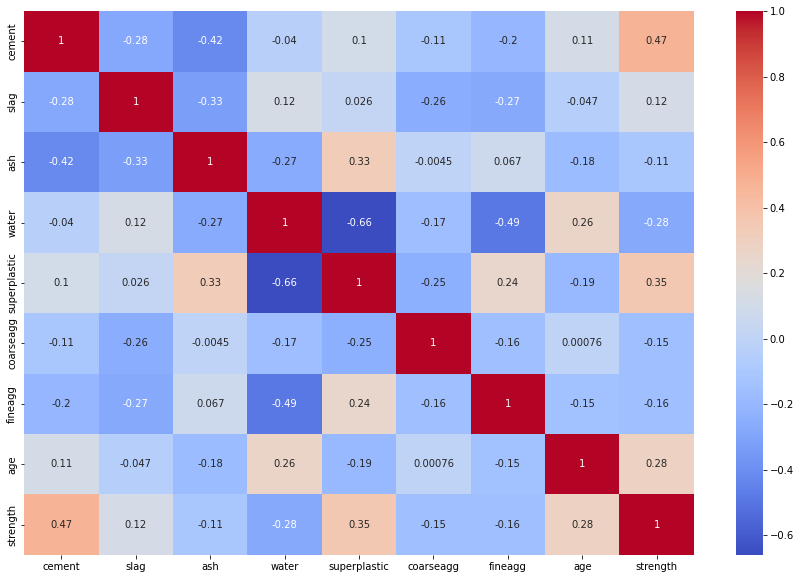

In [7]:


df_bin_chi=df_bin[['strength','age', 'cement','superplastic']].copy(deep=True)

import matplotlib.pyplot as plt
import seaborn as sns
corr = df_bin.corr()
print(corr)
plt.figure(figsize=(15,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True,cmap= 'coolwarm')

feature which is most correlated with the target value: cement


feature which is negatively correlated with the target value: water 


Which 5 features would you keep? Plot a bar chart to verify.


strength        1.000000
cement          0.473928
superplastic    0.353363
age             0.282069
slag            0.115409
ash            -0.110390
coarseagg      -0.154574
fineagg        -0.158696
water          -0.276960
Name: strength, dtype: float64


<AxesSubplot:>

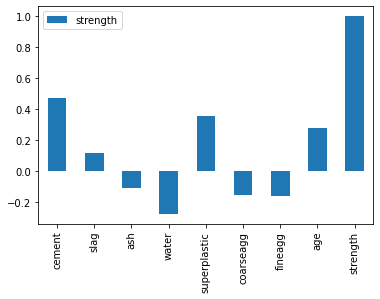

In [8]:
corr_asc=corr['strength'].sort_values(ascending=False).copy(deep=True)
print(corr_asc)

corr[['strength']].plot(kind='bar')

The ones we keep are the ones with the highest correlation score (longest column): cement, microplastic, water, age, fineagg

# Task 7

        PC1       PC2       PC3       PC4       PC5
0 -1.733974 -4.787805  2.798996  0.088252  1.040572
1  5.543338 -0.677878 -1.672263  0.706565  2.843377
2  2.190478 -0.038391 -0.612302  1.121747 -1.883618
3 -3.784361 -2.449149  1.483952 -2.600889 -1.204841
4 -1.211103 -4.963998  0.663355  0.188691  3.078056
variance of first pricipal component: 12.086391982675186


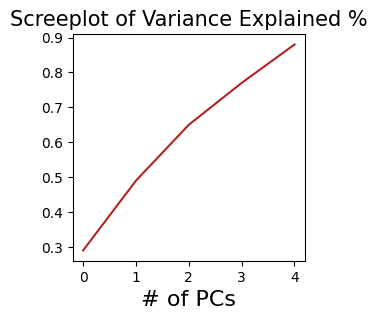

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df_bin)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', ])
print(principalDf.head(5))
print("variance of first pricipal component: "+str(principalDf.PC1.var()))


variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(3,3), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=15)
plt.xlabel('# of PCs', fontsize=16)
plt.show()



0   -0.410210
1   -0.218710
2    0.787440
3   -0.188090
4    0.144959
5    0.076400
6    0.192908
7   -0.143338
8   -0.209391
Name: 0, dtype: float64
feature that has the highest weight in the first PC: ash


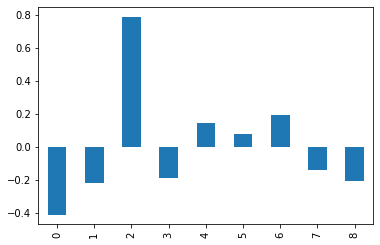

In [10]:


df_pca_loadings = pd.DataFrame(pca.components_)
print(df_pca_loadings.iloc[0, :])

df_pca_loadings.iloc[0, :].plot(kind="bar")
print( "feature that has the highest weight in the first PC: ash" )


0    0.520409
1   -0.265149
2    0.165457
3   -0.361799
4    0.394748
5   -0.216548
6    0.148023
7    0.014866
8    0.525115
Name: 1, dtype: float64
feature that has the highest weight in the second PC: superplastic


<AxesSubplot:>

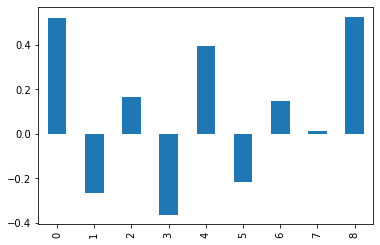

In [11]:

df_pca_loadings = pd.DataFrame(pca.components_)
print(df_pca_loadings.iloc[1, :])
print( "feature that has the highest weight in the second PC: superplastic" )
df_pca_loadings.iloc[1, :].plot(kind="bar")

<AxesSubplot:>

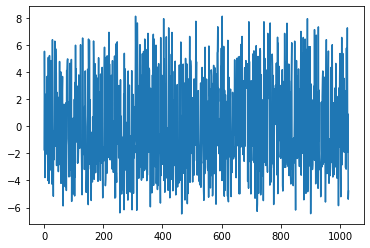

In [12]:
principalDf.PC1.plot()


<AxesSubplot:>

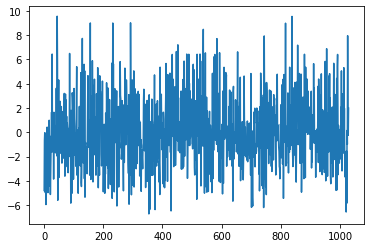

In [13]:
principalDf.PC2.plot()

# Task 8

In [14]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 

X=X.astype(int) 
y=y.astype(int) 
# fit the regressor with X and Y data
regressor.fit(X, y)

print("Score of original data set:")
print(regressor.score(X,y))


X_features=df_bin[[ 'cement', 'superplastic' ,'age', 'water', 'fineagg' ] ]
regressor.fit(X_features,y)

print("Score of feature selected data set:")
print(regressor.score(X_features,y))


  

Score of original data set:
1.0
Score of feature selected data set:
0.8150764647536209
